In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('file:///C:/Users/dipam/Downloads/laptop-price-predictor-regression-project-main/laptop-price-predictor-regression-project-main/laptop_data.csv')
print('No of instances before removing duplicates :',df.shape)
df.drop_duplicates
print('No of instances after removing duplicates :',df.shape)
df.head()

No of instances before removing duplicates : (1303, 12)
No of instances after removing duplicates : (1303, 12)


,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


# Defining Business Problems

# Identify Features Available In This Dataset

In [3]:
df.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

# Exploratory Data Analysis

In [4]:
df.describe(include='number')

,Unnamed: 0,Inches,Price
count,1303.00000,1303.000000,1303.000000
mean,651.00000,15.017191,59870.042910
std,376.28801,1.426304,37243.201786
min,0.00000,10.100000,9270.720000
25%,325.50000,14.000000,31914.720000
50%,651.00000,15.600000,52054.560000
75%,976.50000,15.600000,79274.246400
max,1302.00000,18.400000,324954.720000


In [5]:
df.describe(exclude='number')

,Company,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
count,1303,1303,1303,1303,1303,1303,1303,1303,1303
unique,19,6,40,118,9,39,110,9,179
top,Dell,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.2kg
freq,297,727,507,190,619,412,281,1072,121


### Remove useless column

In [6]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [7]:
# Removing strings from continous columns
df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')

In [8]:
#Changing Datatype
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

# Univariate Analysis

<Axes: >

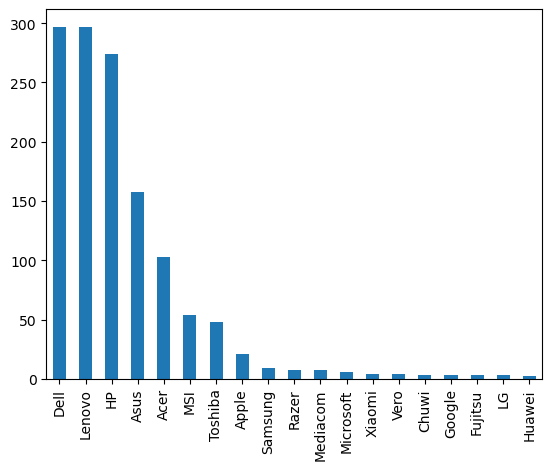

In [9]:
df['Company'].value_counts().plot(kind='bar')

<Axes: >

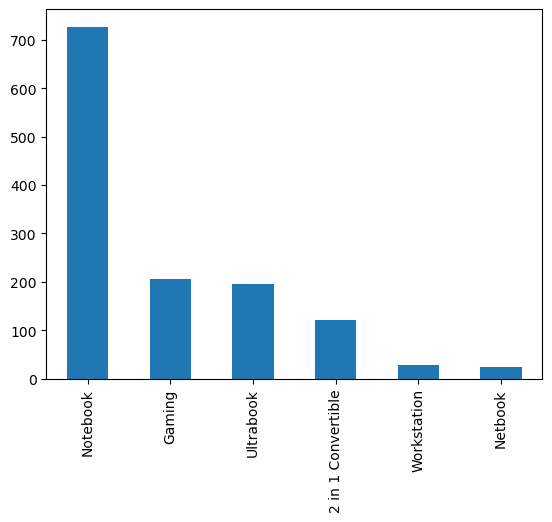

In [10]:
df['TypeName'].value_counts().plot(kind='bar')

<Axes: >

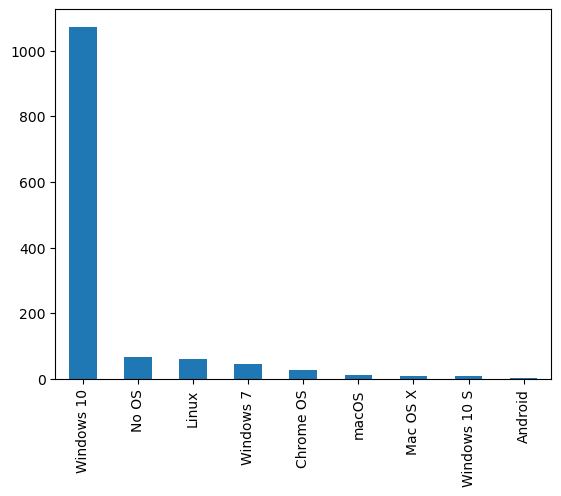

In [11]:
df['OpSys'].value_counts().plot(kind='bar')

<Axes: >

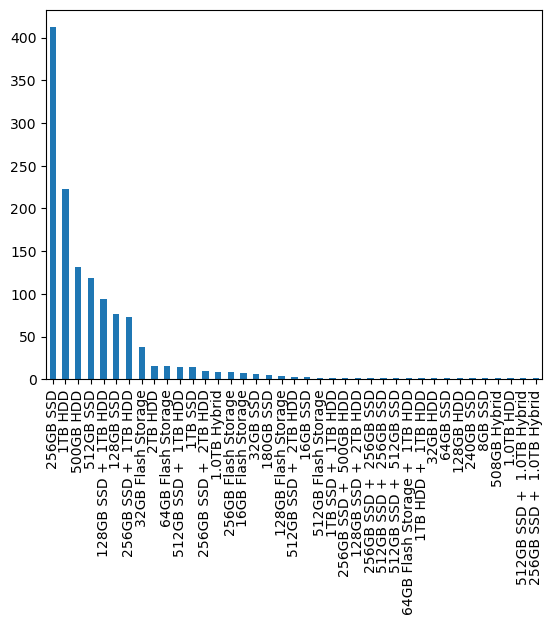

In [12]:
df['Memory'].value_counts().plot(kind='bar')

# Bivariate Analysis

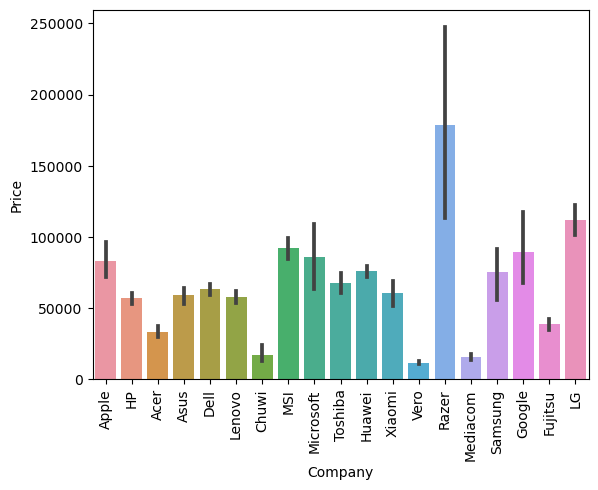

In [13]:
import seaborn as sns
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

## Q.Which Type of laptop model is costliest

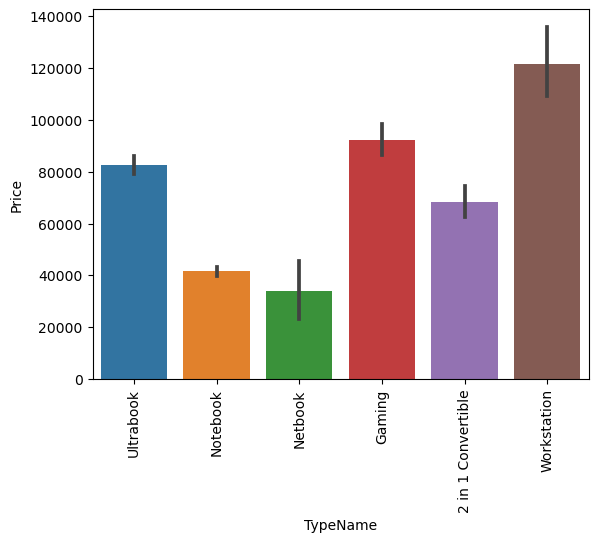

In [14]:
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

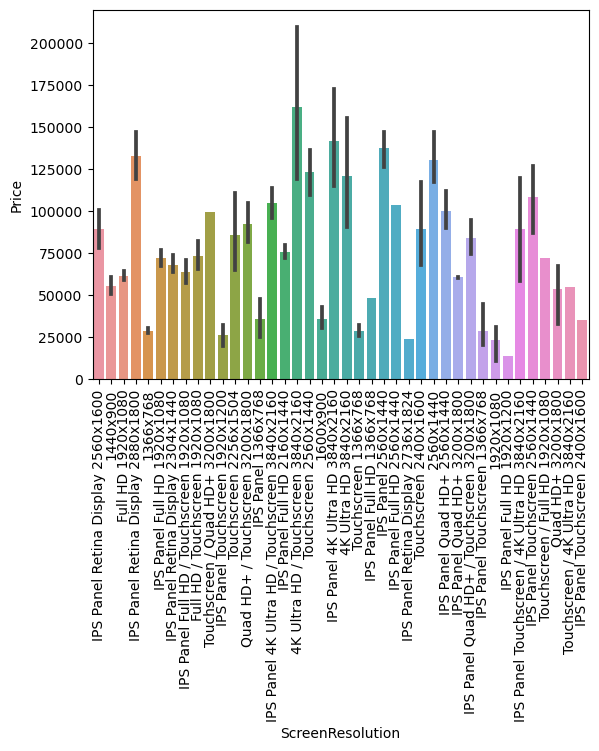

In [15]:
sns.barplot(x=df['ScreenResolution'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [16]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

<Axes: xlabel='Touchscreen', ylabel='Price'>

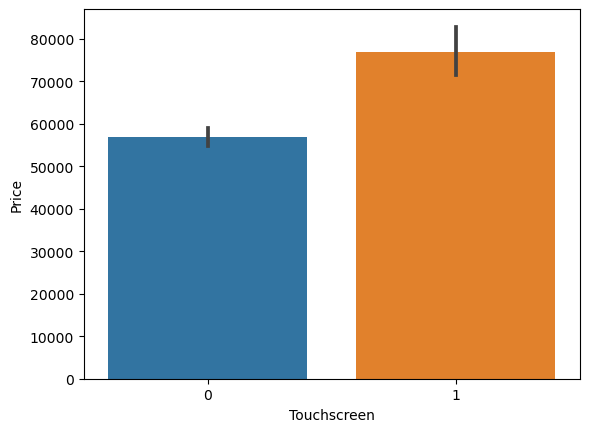

In [17]:
sns.barplot(x=df['Touchscreen'],y=df['Price'])

In [18]:
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

## Q.Does Display Quality matter to influence the price?

<Axes: xlabel='Ips', ylabel='Price'>

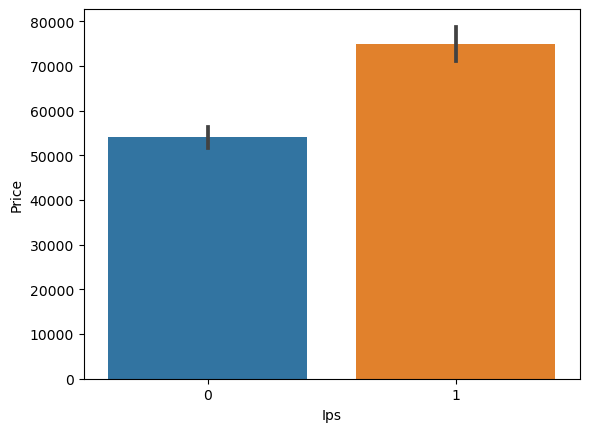

In [19]:
sns.barplot(x=df['Ips'],y=df['Price'])

In [20]:
new = df['ScreenResolution'].str.split('x',n=1,expand=True)
df['X_res'] = new[0]
df['Y_res'] = new[1]

In [21]:
##Removing strings
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [22]:
#Converting datatype after removing string
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')

In [23]:
#create new variable
df['pixel_per_inch'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')

In [24]:
df.drop(columns=['ScreenResolution'],inplace=True)

In [25]:
##Removing strings
df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [26]:
def fetch_processor(text):
    if text in ['Intel Core i7', 'Intel Core i5', 'Intel Core i3']:
        return text
    elif text.startswith('Intel'):
        return 'Other Intel Processor'
    else:
        return 'AMD Processor'


In [27]:
df['Cpu brand'] = df['Cpu Name'].apply(fetch_processor)

## Q.Which Cpu brand is costly

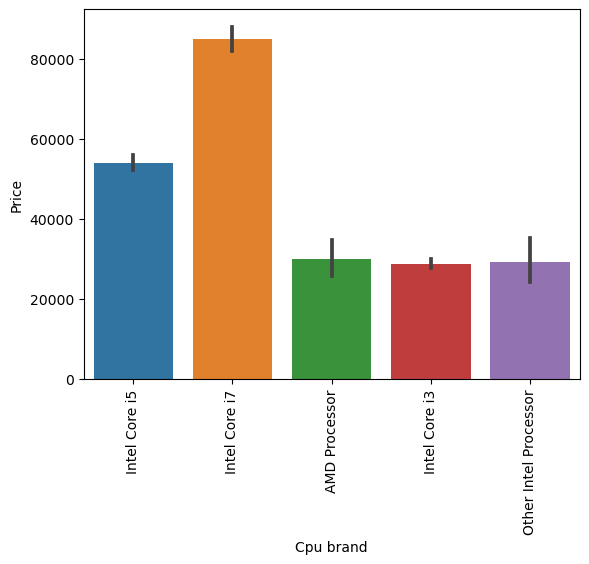

In [28]:
sns.barplot(x=df['Cpu brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [29]:
#Costilest cpu is i7

In [30]:
df.drop(columns=['Cpu','Cpu Name'],inplace=True)

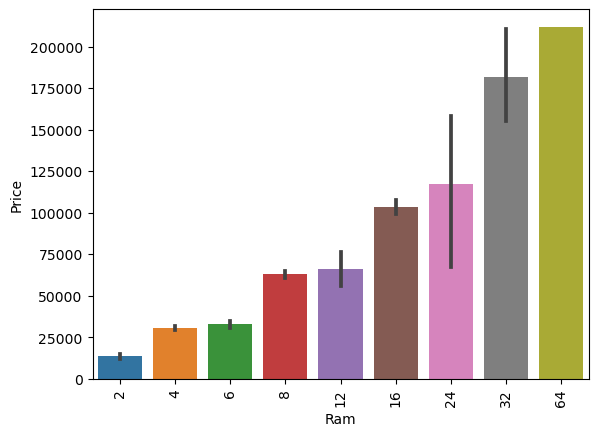

In [31]:
sns.barplot(x=df['Ram'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [32]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

In [33]:
df["first"]= new[0]
df["first"]=df["first"].str.strip()
df["second"]= new[1]
df["second"]=df["second"].str.strip()

In [34]:
df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

In [35]:
df['first'] = df['first'].str.replace(r'\D', '')
df["second"].fillna("0", inplace = True)

C:\Users\dipam\AppData\Local\Temp\ipykernel_17284\1886232230.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['first'] = df['first'].str.replace(r'\D', '')


In [36]:
df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

In [37]:
df['first'] = df['first'].str.replace(r'\D', '')
df["second"].fillna("0", inplace = True)
df['second'] = df['second'].str.replace(r'\D', '')
df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

C:\Users\dipam\AppData\Local\Temp\ipykernel_17284\1722179381.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['first'] = df['first'].str.replace(r'\D', '')
C:\Users\dipam\AppData\Local\Temp\ipykernel_17284\1722179381.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['second'] = df['second'].str.replace(r'\D', '')


In [38]:
df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

In [39]:
df.drop(columns=['Memory'],inplace=True)

In [40]:
#df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

In [41]:
#All widnows in windows category and mac in one category rest is others
def cat_os(inp):
    os_mapping = {
        'Windows 10': 'Windows',
        'Windows 7': 'Windows',
        'Windows 10 S': 'Windows',
        'macOS': 'Mac',
        'Mac OS X': 'Mac'
    }
    return os_mapping.get(inp, 'Others/No OS/Linux')

In [42]:
df['os'] = df['OpSys'].apply(cat_os)

In [43]:
df.drop(columns=['OpSys'],inplace=True)

## Q.Which os laptops are most costly

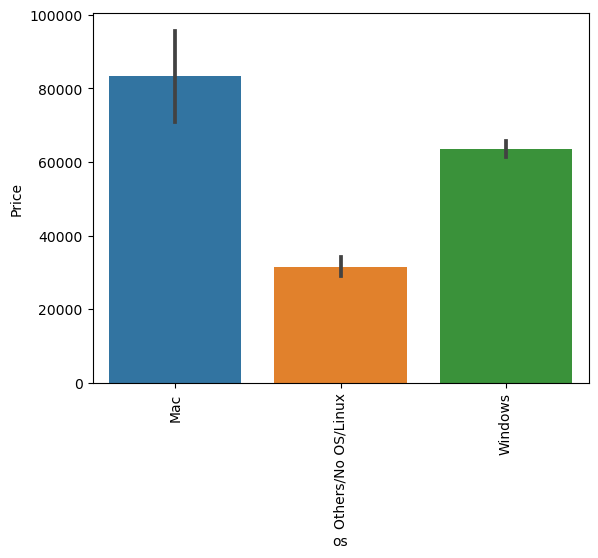

In [44]:
sns.barplot(x=df['os'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [45]:
df.dtypes

Company            object
TypeName           object
Inches            float64
Ram                 int32
Gpu                object
Weight            float32
Price             float64
Touchscreen         int64
Ips                 int64
X_res               int32
Y_res               int32
pixel_per_inch    float64
Cpu brand          object
os                 object
dtype: object

In [46]:
cont_col1=list(df[df.dtypes[df.dtypes=='int32'].index].columns)
cont_col2=list(df[df.dtypes[df.dtypes=='float64'].index].columns)
cont_col3=list(df[df.dtypes[df.dtypes=='int64'].index].columns)
cont_col4=list(df[df.dtypes[df.dtypes=='float32'].index].columns)
all_cont=cont_col1+cont_col2+cont_col3+cont_col4

In [47]:
all_cont

['Ram',
 'X_res',
 'Y_res',
 'Inches',
 'Price',
 'pixel_per_inch',
 'Touchscreen',
 'Ips',
 'Weight']

C:\Users\dipam\AppData\Local\Temp\ipykernel_17284\1024720728.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], ax=axes[i])
C:\Users\dipam\AppData\Local\Temp\ipykernel_17284\1024720728.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], ax=axes[i])
C:\Users\dipam\AppData\Local

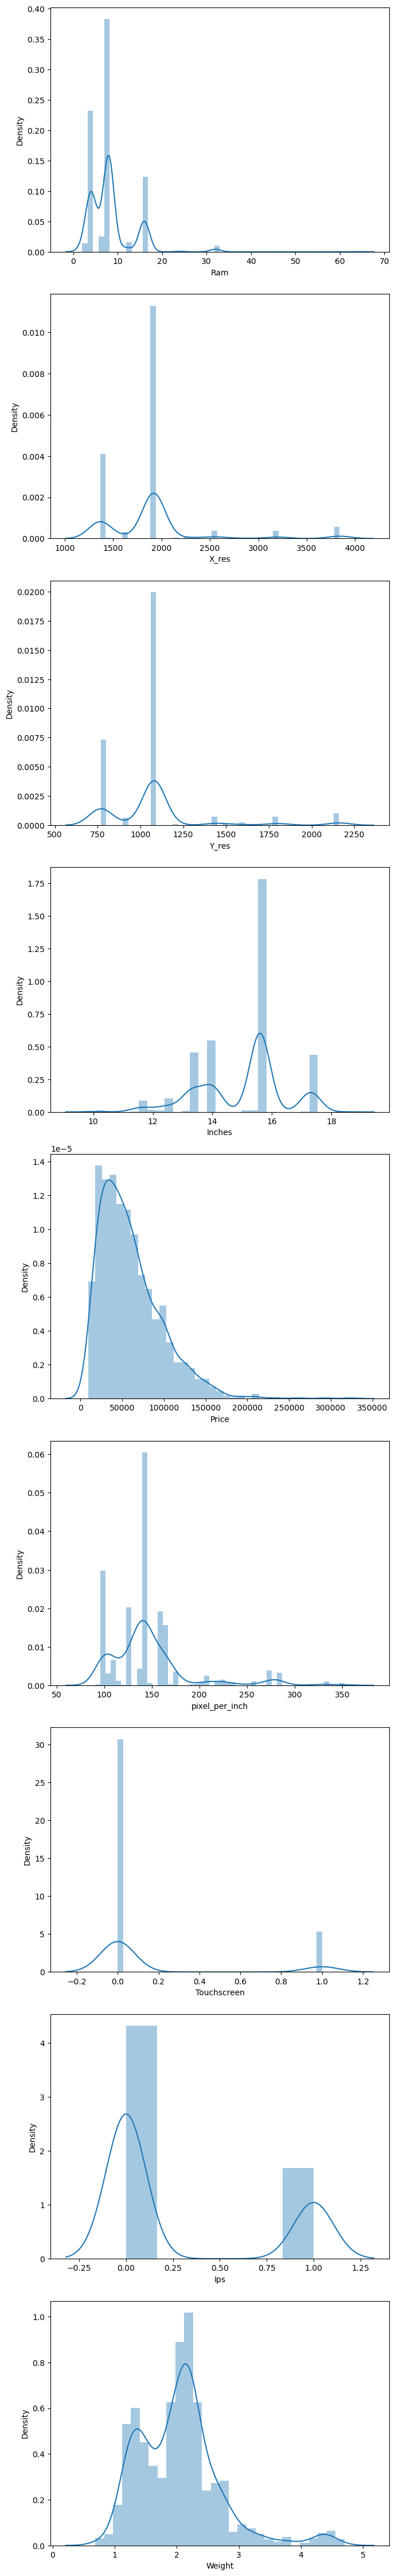

In [48]:
fig, axes = plt.subplots(len(all_cont), 1, figsize=(7, 5*len(all_cont)))

for i, col in enumerate(all_cont):
    sns.distplot(df[col], ax=axes[i])

plt.tight_layout()
plt.show()

# Checking Missing values

In [49]:
df.isnull().sum()

Company           0
TypeName          0
Inches            0
Ram               0
Gpu               0
Weight            0
Price             0
Touchscreen       0
Ips               0
X_res             0
Y_res             0
pixel_per_inch    0
Cpu brand         0
os                0
dtype: int64

In [50]:
#nothing found

# Outlier Checking and Treatment

In [51]:
all_cont

['Ram',
 'X_res',
 'Y_res',
 'Inches',
 'Price',
 'pixel_per_inch',
 'Touchscreen',
 'Ips',
 'Weight']

<Axes: >

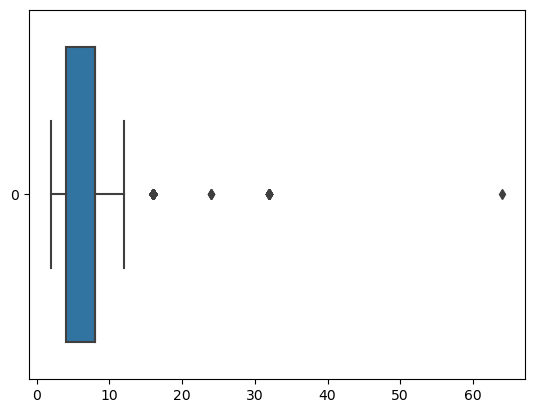

In [52]:
sns.boxplot(data=df['Ram'],orient='hue')

<Axes: >

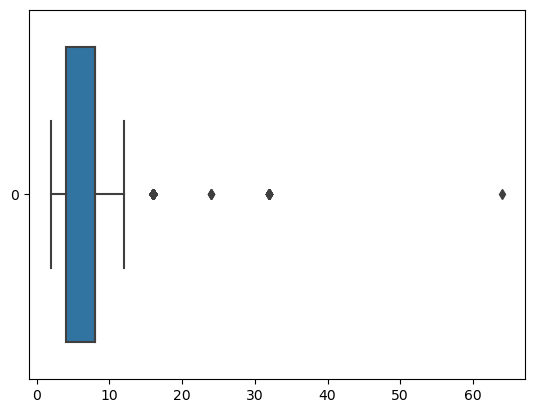

In [53]:
sns.boxplot(data=df['Ram'],orient='hue')

In [54]:
def outlier_findings(inpdata):
    quantile1, quantile3= np.percentile(inpdata,[25,75])
    print('Quartile 1 :',quantile1,'Quartile 3 :',quantile3)
    iqr_value=quantile3-quantile1
    
    print("Inter Quartile Range :",iqr_value)
    lower_bound_val = quantile1 -(1.5 * iqr_value) 
    upper_bound_val = quantile3 +(1.5 * iqr_value) 
    
    print("Min Whisker :",lower_bound_val,"Max Whiker :",upper_bound_val)
    lower_outliers = np.where(inpdata < lower_bound_val)
    upper_outliers = np.where(inpdata > upper_bound_val)
    
    print("Number of values below the lower bound:", len(lower_outliers[0]))
    print("Number of values above the upper bound:", len(upper_outliers[0]))

In [55]:
outlier_findings(inpdata=df['Ram'])

Quartile 1 : 4.0 Quartile 3 : 8.0
Inter Quartile Range : 4.0
Min Whisker : -2.0 Max Whiker : 14.0
Number of values below the lower bound: 0
Number of values above the upper bound: 221


In [56]:
outlier_findings(inpdata=df['Inches'])

Quartile 1 : 14.0 Quartile 3 : 15.6
Inter Quartile Range : 1.5999999999999996
Min Whisker : 11.600000000000001 Max Whiker : 18.0
Number of values below the lower bound: 38
Number of values above the upper bound: 1


In [57]:
outlier_findings(inpdata=df['Weight'])

Quartile 1 : 1.5 Quartile 3 : 2.299999952316284
Inter Quartile Range : 0.7999999523162842
Min Whisker : 0.30000007152557373 Max Whiker : 3.4999998807907104
Number of values below the lower bound: 0
Number of values above the upper bound: 46


### Treating outliers with winsorization technique

In [58]:
for i in all_cont:
    q1 = np.percentile(df[i], 25)
    q3 = np.percentile(df[i], 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df[i] = np.where(df[i] > upper_bound, upper_bound,np.where(df[i] < lower_bound,lower_bound,df[i]))

In [59]:
outlier_findings(inpdata=df['Ram'])

Quartile 1 : 4.0 Quartile 3 : 8.0
Inter Quartile Range : 4.0
Min Whisker : -2.0 Max Whiker : 14.0
Number of values below the lower bound: 0
Number of values above the upper bound: 0


# Checking Correlation

C:\Users\dipam\AppData\Local\Temp\ipykernel_17284\2948069209.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), linewidths=1.0, annot=True, fmt=".2f", cmap='viridis')


<function matplotlib.pyplot.show(close=None, block=None)>

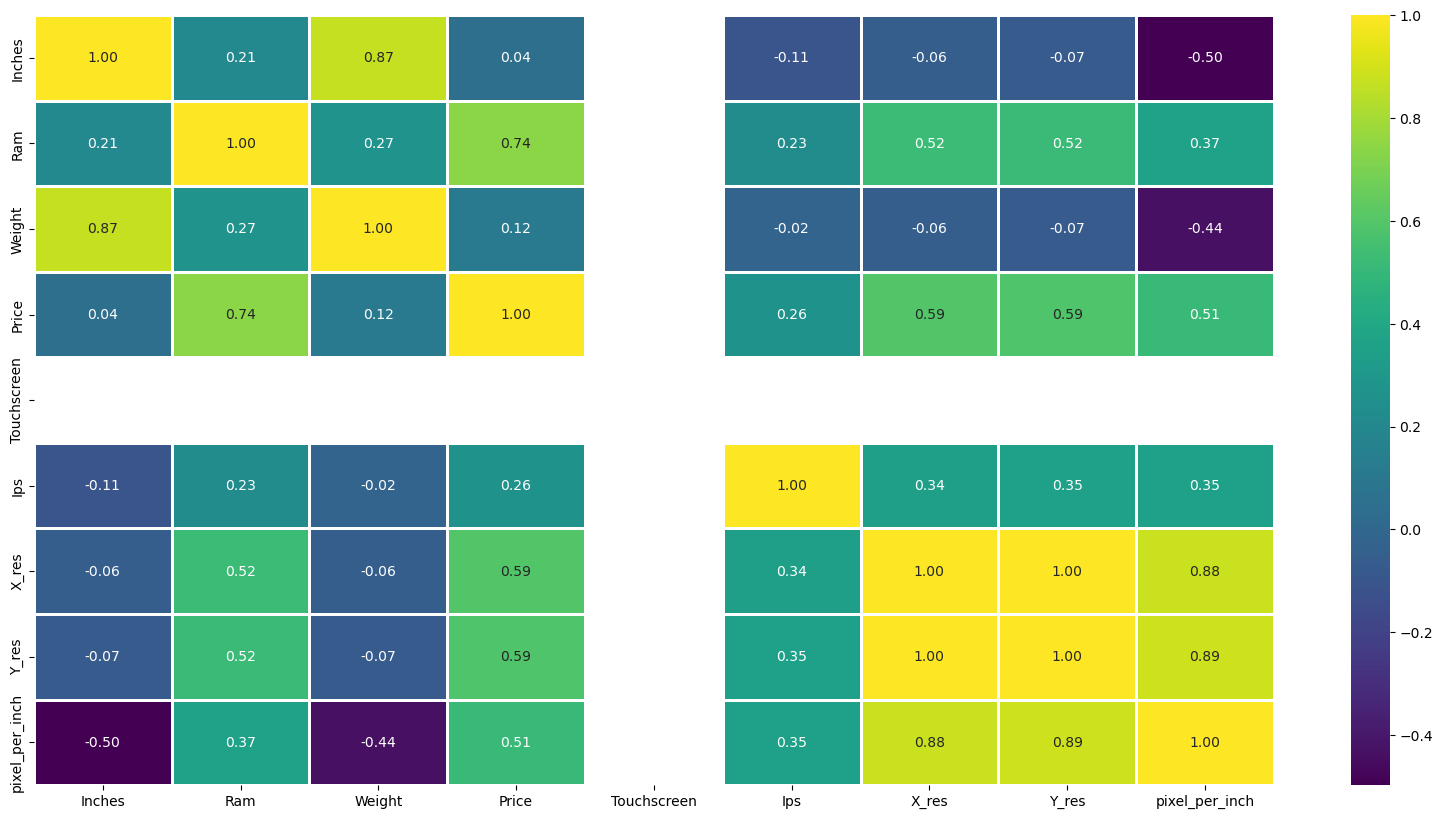

In [60]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), linewidths=1.0, annot=True, fmt=".2f", cmap='viridis')
plt.show

In [61]:
#calculating vif to check the multicollineairty range

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(data):
    
    non_numeric_cols = data.select_dtypes(exclude=np.number).columns.tolist()
    if non_numeric_cols:
        data = data.select_dtypes(include=np.number)
    if data.isnull().any().any():
        data = data.dropna()
    vif_data = pd.DataFrame()
    vif_data["Feature"] = data.columns
    vif_data["VIF"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    return vif_data
vif_scores = calculate_vif(df)

print(vif_scores.sort_values(by="VIF"))


          Feature          VIF
5             Ips     1.642367
3           Price    10.402069
1             Ram    15.629360
2          Weight    49.358059
0          Inches   108.629861
8  pixel_per_inch   281.015628
6           X_res  7830.406661
7           Y_res  7929.124455
4     Touchscreen          NaN


D:\Anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1754: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


In [62]:
df.drop('Y_res',axis=1,inplace=True)

In [63]:
vif_scores = calculate_vif(df)

print(vif_scores.sort_values(by="VIF"))

          Feature         VIF
5             Ips    1.638489
3           Price   10.384572
1             Ram   15.629313
2          Weight   49.352112
0          Inches  108.626912
7  pixel_per_inch  271.251306
6           X_res  436.653036
4     Touchscreen         NaN


D:\Anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1754: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


In [64]:
df.drop('X_res',axis=1,inplace=True)

In [65]:
vif_scores = calculate_vif(df)

print(vif_scores.sort_values(by="VIF"))

          Feature         VIF
5             Ips    1.636607
3           Price   10.362752
1             Ram   15.239465
6  pixel_per_inch   38.942345
2          Weight   43.033197
0          Inches  101.839302
4     Touchscreen         NaN


D:\Anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1754: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


In [66]:
df.drop('Inches',axis=1,inplace=True)

In [67]:
vif_scores = calculate_vif(df)

print(vif_scores.sort_values(by="VIF"))

          Feature        VIF
4             Ips   1.548218
1          Weight   7.794640
2           Price   9.651309
5  pixel_per_inch  10.176492
0             Ram  15.223161
3     Touchscreen        NaN


D:\Anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1754: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


In [68]:
df.drop('Ram',axis=1,inplace=True)

In [69]:
vif_scores = calculate_vif(df)

print(vif_scores.sort_values(by="VIF"))

          Feature       VIF
3             Ips  1.545822
1           Price  5.408153
0          Weight  6.413686
4  pixel_per_inch  9.742811
2     Touchscreen       NaN


D:\Anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1754: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


In [70]:
#No values found beyond 10 hence we can proceed further.

# Spliting Data

In [71]:
df_dummies=pd.get_dummies(df,drop_first=True)

In [72]:
X = df_dummies.drop(columns=['Price'])
y = np.log(df_dummies['Price'])

In [73]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

# Feature Selection

In [74]:
# from sklearn.feature_selection import RFECV
# from sklearn.linear_model import LinearRegression
# model = LinearRegression()
# rfe = RFECV(estimator=model,cv=5,step=1)
# rfe.fit(X, y)
# selected_features = np.where(rfe.support_)[0]
# print("Selected feature indices:", selected_features.tolist())

In [75]:
# column_names = df_dummies.columns.tolist()
# index_numbers = selected_features 
# selected_columns = [column_names[i] for i in index_numbers]
# print("Selected columns:", selected_columns)

In [76]:
# After doing feature selection performance of models get reduced so we will perform with all the features.

# Statistical Model-OLS

In [77]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train)
results = model.fit()
p_values = results.pvalues
selected_features = X_train.columns[p_values <= 0.05]
X_train_filtered = X_train[selected_features]
model_filtered = sm.OLS(y_train, X_train_filtered)
results_filtered = model_filtered.fit()
print(results_filtered.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     99.59
Date:                Tue, 20 Jun 2023   Prob (F-statistic):               0.00
Time:                        11:14:25   Log-Likelihood:                 22.496
No. Observations:                1107   AIC:                             77.01
Df Residuals:                    1046   BIC:                             382.6
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [78]:
from sklearn.metrics import mean_squared_error, r2_score
X_test = sm.add_constant(X_test)
X_test_filtered = X_test[selected_features]
y_pred_test = results_filtered.predict(X_test_filtered)
r2_test = r2_score(y_test, y_pred_test)
print("Test Set - R-squared (R2):", r2_test)

Test Set - R-squared (R2): 0.846164795247978


In [79]:
error=y_pred_test-y_test

In [80]:
#Durbin Watson- Value almost close to 2 but there is some presence of autocorrelation.
#Omnibus-Overall data is normall distributed as from the p value we have to acceptnull hypothesis.
#Jarque-Bera-Standout,where h0 is the skewness and kurtosis is behaving normal.
#Skewness-Slightly negatively skewd.
#Kurtosis-Data is concentrated more heavily around the mean.As the pekdness is high.
#Annova-Atleast one pair of group have significant difference in mean laptop price,so f statistics standout. 

<Axes: ylabel='Count'>

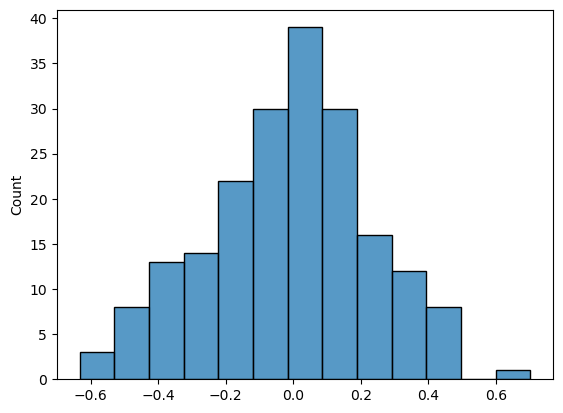

In [81]:
sns.histplot(data=error)

In [82]:
#One of the assumption of ols is satisfied errors are normally distributed

In [83]:
#X_train_filtered

# Random Forest

In [90]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf_model = RandomForestRegressor(n_estimators=500,max_depth=15,min_samples_leaf=1,min_samples_split=5)

rf_model.fit(X_train, y_train)

y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)


mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train=np.sqrt(mse_train)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test=np.sqrt(mse_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print("Train Set - RMSE:", rmse_train)
print("Train Set - R-squared (R2):", r2_train)
print("Test Set - RMSE:",rmse_test )
print("Test Set - R-squared (R2):", r2_test)


Train Set - RMSE: 0.12801999141595893
Train Set - R-squared (R2): 0.9565711626290457
Test Set - RMSE: 0.21714946445212763
Test Set - R-squared (R2): 0.8760245733220775


# Feature Importance

Feature ranking:
1. Feature 139: 0.35515136662868274
2. Feature 138: 0.18578147300905604
3. Feature 1: 0.11742571828691349
4. Feature 4: 0.08392920927344344
5. Feature 25: 0.0559601122663932
6. Feature 140: 0.027484468910096344
7. Feature 27: 0.015791297901783085
8. Feature 73: 0.012461972253450936
9. Feature 141: 0.009094283707757275
10. Feature 142: 0.008283407644685747


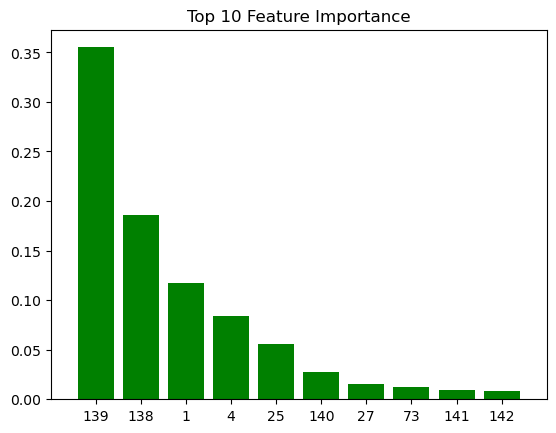

In [91]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)
importances = regressor.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
for f in range(10):
    print(f"{f + 1}. Feature {indices[f]}: {importances[indices[f]]}")
    
import matplotlib.pyplot as plt

plt.figure()
plt.title("Top 10 Feature Importance")
plt.bar(range(10), importances[indices[:10]], color="g", align="center")
plt.xticks(range(10), indices[:10])
plt.xlim([-1, 10])
plt.show()

In [92]:
column_names = df_dummies.columns.tolist()
index_numbers = [139,138,4,25,140,27,73,141,142]  
selected_columns = [column_names[i] for i in index_numbers]
print("Selected columns:", np.array(selected_columns))

Selected columns: ['Cpu brand_Intel Core i7' 'Cpu brand_Intel Core i5' 'pixel_per_inch'
 'TypeName_Notebook' 'Cpu brand_Other Intel Processor'
 'TypeName_Workstation' 'Gpu_Intel HD Graphics 515'
 'os_Others/No OS/Linux' 'os_Windows']


# Optuna Performing

In [93]:
import optuna
def objective(trial):
    # Define the hyperparameters to tune
    n_estimators = trial.suggest_int('n_estimators', 100, 1000, step=100)
    max_depth = trial.suggest_int('max_depth', 5, 15)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5)
    
    regressor = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    regressor.fit(X_train, y_train)

    y_pred = regressor.predict(X_test)

    mse_test = mean_squared_error(y_test, y_pred)
    rmse_test=np.sqrt(mse_test)
    return rmse_test
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=20)

best_params = study.best_params
best_value = study.best_value
print("Best Parameters: ", best_params)
print("Best Value: ", best_value)

[I 2023-06-20 11:14:36,129] A new study created in memory with name: no-name-b3f52a06-b9a2-4d96-b445-6f81c9e9abbf
[I 2023-06-20 11:14:36,869] Trial 0 finished with value: 0.26142558427534496 and parameters: {'n_estimators': 200, 'max_depth': 5, 'min_samples_split': 3, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.26142558427534496.
[I 2023-06-20 11:14:39,752] Trial 1 finished with value: 0.23921831145371783 and parameters: {'n_estimators': 600, 'max_depth': 12, 'min_samples_split': 9, 'min_samples_leaf': 4}. Best is trial 1 with value: 0.23921831145371783.
[I 2023-06-20 11:14:43,985] Trial 2 finished with value: 0.221090761343311 and parameters: {'n_estimators': 900, 'max_depth': 14, 'min_samples_split': 10, 'min_samples_leaf': 1}. Best is trial 2 with value: 0.221090761343311.
[I 2023-06-20 11:14:45,825] Trial 3 finished with value: 0.2607391191236629 and parameters: {'n_estimators': 500, 'max_depth': 5, 'min_samples_split': 3, 'min_samples_leaf': 4}. Best is trial 2 with valu

Best Parameters:  {'n_estimators': 800, 'max_depth': 15, 'min_samples_split': 5, 'min_samples_leaf': 1}
Best Value:  0.21628176412306271


# Decision Tree

In [94]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

DTR_model = DecisionTreeRegressor(max_depth=12,min_samples_leaf=2,min_samples_split=15)

DTR_model.fit(X_train, y_train)

y_pred_train = DTR_model.predict(X_train)
y_pred_test = DTR_model.predict(X_test)


mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train=np.sqrt(mse_train)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test=np.sqrt(mse_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print("Train Set - RMSE:", rmse_train)
print("Train Set - R-squared (R2):", r2_train)
print("Test Set - RMSE:",rmse_test )
print("Test Set - R-squared (R2):", r2_test)


Train Set - RMSE: 0.18125766407642074
Train Set - R-squared (R2): 0.912940659445745
Test Set - RMSE: 0.24145893248520653
Test Set - R-squared (R2): 0.8467132420464196


In [95]:
import optuna
def objective(trial):
    max_depth = trial.suggest_int('max_depth', 5, 18)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 15)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5)
    
    regressor = DecisionTreeRegressor(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    regressor.fit(X_train, y_train)

    y_pred = regressor.predict(X_test)

    mse_test = mean_squared_error(y_test, y_pred)
    rmse_test=np.sqrt(mse_test)
    return rmse_test
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

best_params = study.best_params
best_value = study.best_value
print("Best Parameters: ", best_params)
print("Best Value: ", best_value)

[I 2023-06-20 11:16:27,394] A new study created in memory with name: no-name-f2da653d-7592-40ea-9d47-16758c5c370f
[I 2023-06-20 11:16:27,412] Trial 0 finished with value: 0.26634554080763917 and parameters: {'max_depth': 9, 'min_samples_split': 4, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.26634554080763917.
[I 2023-06-20 11:16:27,425] Trial 1 finished with value: 0.26844737613872727 and parameters: {'max_depth': 8, 'min_samples_split': 7, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.26634554080763917.
[I 2023-06-20 11:16:27,443] Trial 2 finished with value: 0.23962743006978476 and parameters: {'max_depth': 9, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 2 with value: 0.23962743006978476.
[I 2023-06-20 11:16:27,466] Trial 3 finished with value: 0.2493212649637681 and parameters: {'max_depth': 14, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 2 with value: 0.23962743006978476.
[I 2023-06-20 11:16:27,494] Trial 4 finished with value: 0

Best Parameters:  {'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 2}
Best Value:  0.2375032453876532


Feature ranking:
1. Feature 139: 0.3624059287390772
2. Feature 138: 0.18897721545413326
3. Feature 1: 0.11443861352575085
4. Feature 4: 0.08722588201336197
5. Feature 25: 0.04981078826765453
6. Feature 140: 0.025226147586562678
7. Feature 27: 0.02410545512021624
8. Feature 141: 0.015494827126230034
9. Feature 64: 0.011305536316574185
10. Feature 106: 0.009757747485983487


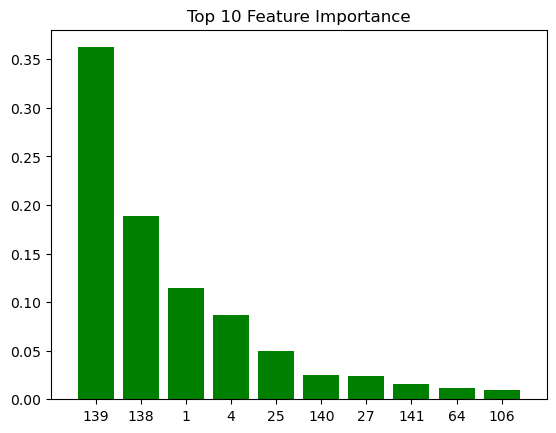

In [96]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
importances = regressor.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
for f in range(10):
    print(f"{f + 1}. Feature {indices[f]}: {importances[indices[f]]}")
    
import matplotlib.pyplot as plt

plt.figure()
plt.title("Top 10 Feature Importance")
plt.bar(range(10), importances[indices[:10]], color="g", align="center")
plt.xticks(range(10), indices[:10])
plt.xlim([-1, 10])
plt.show()

In [97]:
column_names = df_dummies.columns.tolist()
index_numbers = [139,138,4,25,140,27,141,64,106]  
selected_columns = [column_names[i] for i in index_numbers]
print("Selected columns:", np.array(selected_columns))

Selected columns: ['Cpu brand_Intel Core i7' 'Cpu brand_Intel Core i5' 'pixel_per_inch'
 'TypeName_Notebook' 'Cpu brand_Other Intel Processor'
 'TypeName_Workstation' 'os_Others/No OS/Linux' 'Gpu_AMD Radeon RX 580'
 'Gpu_Nvidia GeForce GTX 1060']


# KNN

In [98]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,r2_score

knn_model = KNeighborsRegressor(n_neighbors=3)

knn_model.fit(X_train, y_train)

y_pred_train = knn_model.predict(X_train)
y_pred_test = knn_model.predict(X_test)

mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train=np.sqrt(mse_train)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test=np.sqrt(mse_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print("Train Set - RMSE:", rmse_train)
print("Train Set - R-squared (R2):", r2_train)
print("Test Set - RMSE:",rmse_test )
print("Test Set - R-squared (R2):", r2_test)

Train Set - RMSE: 0.17877403152642798
Train Set - R-squared (R2): 0.9153101266084173
Test Set - RMSE: 0.2577142834680454
Test Set - R-squared (R2): 0.8253795652141839


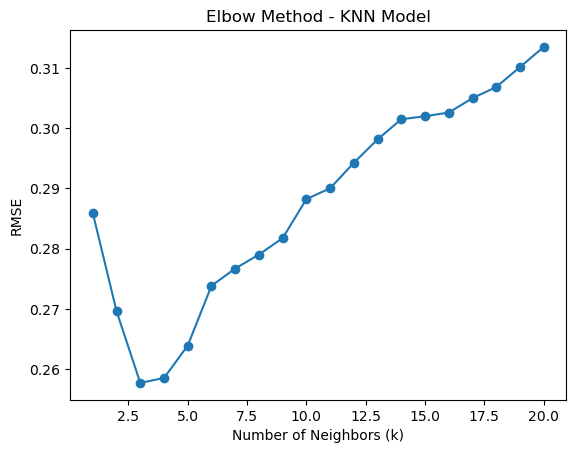

In [99]:
k_values = []
rmse_values = []
for k in range(1, 21):
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    k_values.append(k)
    rmse_values.append(rmse)
# Plot the RMSE values against the number of neighbors (k)
plt.plot(k_values, rmse_values, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('RMSE')
plt.title('Elbow Method - KNN Model')
plt.show()

In [100]:
# Ideal k from the graph we can see that 3,where drastically decreased after that RMSE increased

# Adaboost

In [101]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import AdaBoostRegressor

Ada_model = AdaBoostRegressor(n_estimators=300, learning_rate=0.029792329343184265, loss='exponential')

Ada_model.fit(X_train, y_train)

y_pred_train = Ada_model.predict(X_train)
y_pred_test = Ada_model.predict(X_test)

mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print("Train Set - RMSE:", rmse_train)
print("Train Set - R-squared (R2):", r2_train)
print("Test Set - RMSE:", rmse_test)
print("Test Set - R-squared (R2):", r2_test)


Train Set - RMSE: 0.31283700173230616
Train Set - R-squared (R2): 0.7406663662317521
Test Set - RMSE: 0.3180631147324592
Test Set - R-squared (R2): 0.734022621282332


In [102]:
import optuna
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 100, 1000, step=100)
    learning_rate = trial.suggest_uniform('learning_rate', 0.01, 0.2)
    loss = trial.suggest_categorical('loss', ['linear', 'square', 'exponential'])
    
    regressor = AdaBoostRegressor(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        loss=loss,
        random_state=42
    )
    regressor.fit(X_train, y_train)

    y_pred = regressor.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    return mse

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=20)

best_params = study.best_params
best_value = study.best_value
print("Best Parameters: ", best_params)
print("Best Value: ", best_value)


[I 2023-06-20 11:16:36,789] A new study created in memory with name: no-name-6168f4b6-1a9b-43ff-8d4f-749abe10fbdd
C:\Users\dipam\AppData\Local\Temp\ipykernel_17284\1812736972.py:4: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.01, 0.2)
[I 2023-06-20 11:16:44,255] Trial 0 finished with value: 0.1106417195984071 and parameters: {'n_estimators': 800, 'learning_rate': 0.08233091509860782, 'loss': 'square'}. Best is trial 0 with value: 0.1106417195984071.
C:\Users\dipam\AppData\Local\Temp\ipykernel_17284\1812736972.py:4: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.01, 0.2)
[I 2023-06-20 11:16:46,

Best Parameters:  {'n_estimators': 100, 'learning_rate': 0.04197272487943265, 'loss': 'square'}
Best Value:  0.09867518244973318


# Conclusion

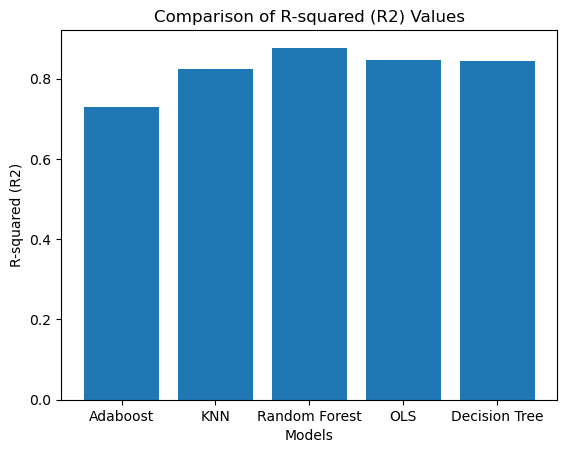

In [103]:
import matplotlib.pyplot as plt
models = ['Adaboost', 'KNN', 'Random Forest', 'OLS','Decision Tree']
r2_values = [0.730, 0.825, 0.877, 0.846,0.844]
plt.bar(models, r2_values)
plt.xlabel('Models')
plt.ylabel('R-squared (R2)')
plt.title('Comparison of R-squared (R2) Values')
plt.show()

# Conclusion